<a href="https://colab.research.google.com/github/devmedeiros/Challenge-Data-Science/blob/main/AluraVoz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alura Voz

# First Week

## Data Cleaning

First of, we need to load the data and the libraries.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'
data = pd.read_json(url)
data.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
customer = pd.json_normalize(data.customer)
phone = pd.json_normalize(data.phone)
internet = pd.json_normalize(data.internet)
account = pd.json_normalize(data.account)
data.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)
data = pd.concat([data, customer, phone, internet, account], axis=1)
data.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Now that the dataset is well formatted, let's look for missing data. I noticed that in the `Churn` column there was empty space that python was considering `NaN`, so I replaced that before counting the missing data.

In [ ]:
data.replace('', np.nan, inplace=True)
data.isnull().sum()

customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total         0
dtype: int64

I suspect that the missing `Churn` means that the reason a client is not part of the company is not by choice. Maybe this assumption is not true and is just an error, but either way, I think is better to not take this missing data into consideration.

In [ ]:
data.dropna(inplace=True)

Since there isn't any missing data, I'll be translating the columns and the data to portuguese, as this was requested by the company.

In [ ]:
ColumnDict = {
    'customerID': 'IDCliente',
    'Churn': 'Evasao',
    'gender': 'Genero',
    'SeniorCitizen': 'ClienteIdoso',
    'Partner': 'Parceiro',
    'Dependents': 'Dependentes',
    'tenure': 'Estabilidade',
    'PhoneService': 'ServicoTelefone',
    'MultipleLines': 'DiversasLinhas',
    'InternetService': 'ServicoInternet',
    'OnlineSecurity': 'SegurancaOnline',
    'OnlineBackup': 'BackupOnline',
    'DeviceProtection': 'ProtecaoAparelho',
    'TechSupport': 'SuporteTecnico',
    'StreamingTV': 'StreamTV',
    'StreamingMovies': 'StreamFilmes',
    'Contract': 'Contrato',
    'PaperlessBilling': 'ContaDigital',
    'PaymentMethod': 'MetodoPagamento',
    'Charges.Monthly': 'CobrancaMensal',
    'Charges.Total': 'CobrancaTotal'
}

YesNoDict = {
    'Yes': 'Sim',
    'No': 'Não'
}

## Data Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

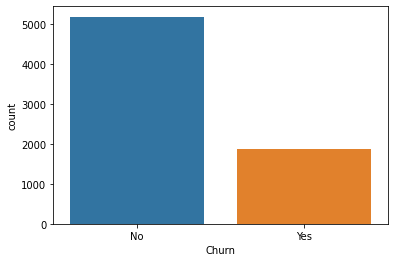

In [ ]:
sns.countplot(x="Churn", data=data)

In [ ]:
columns = [
            'gender',
            'SeniorCitizen',
            'Partner',
            'Dependents',
            'PhoneService',
            'MultipleLines',
            'InternetService',
            'OnlineSecurity',
            'OnlineBackup',
            'DeviceProtection',
            'TechSupport',
            'StreamingTV',
            'StreamingMovies',
            'Contract',
            'PaperlessBilling',
            'PaymentMethod'       
]

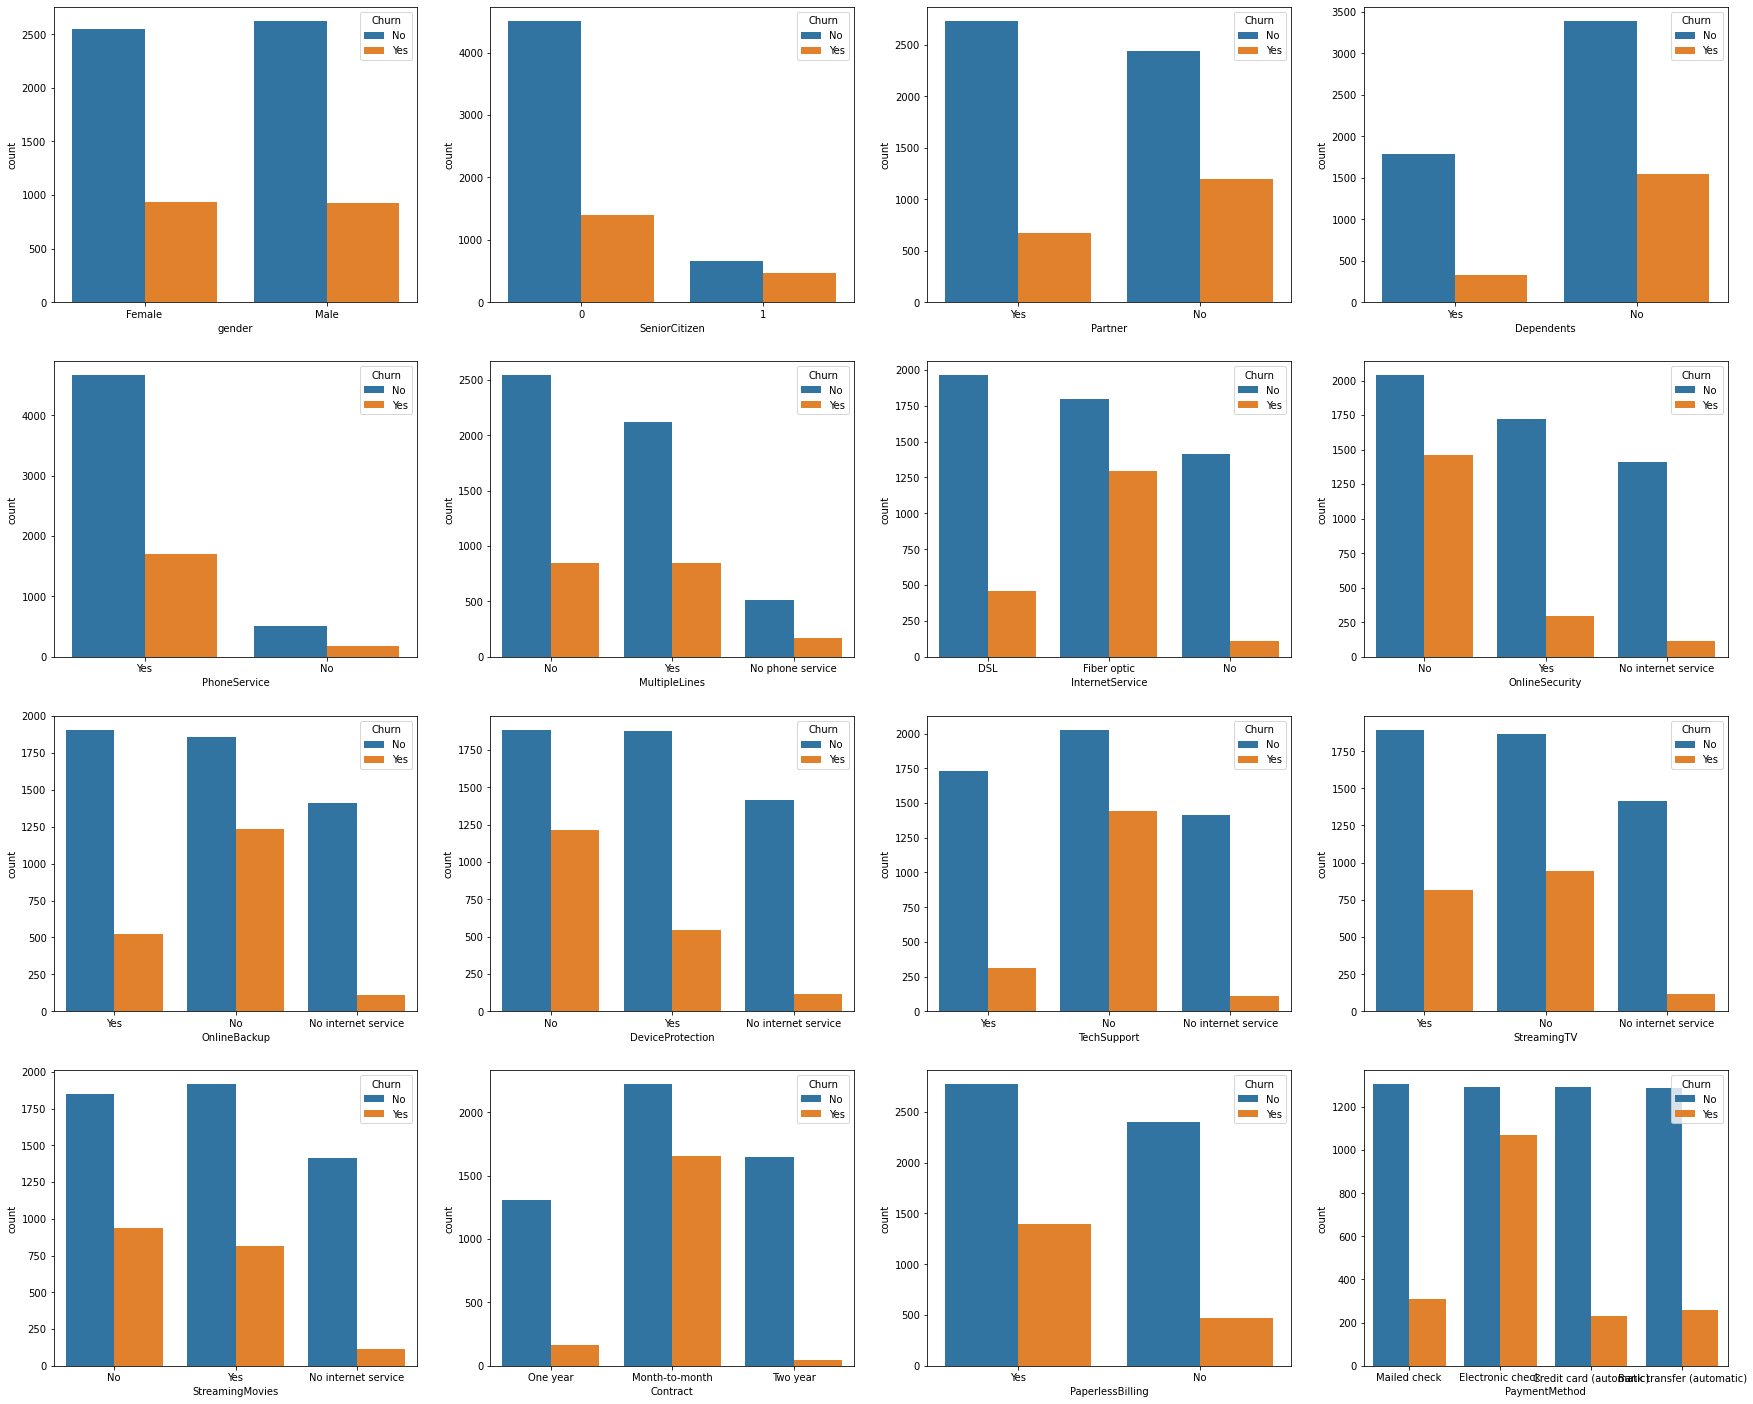

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=[30,25])
axs = axs.flatten()
i=0
for column in columns:
  sns.countplot(x=column, hue='Churn', data=data, ax=axs[i])
  i = i + 1

Looking at the graphs by glance we can see that the payment method, contract, tech support, online backup and, internet service, seems to be defining factors to whether or not the client leave the company.

In [ ]:
data[data.Churn == 'Yes'][columns].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
2,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check
3,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
4,Female,1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check
18,Male,1,No,No,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Credit card (automatic)
19,Male,1,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [ ]:
from scipy.stats import chi2_contingency 

In [ ]:
test_data = pd.DataFrame(data=columns, columns=['features'])
test_data['p'] = np.nan
test_data['null_hypothesis'] = np.nan

i = 0
for column in columns:
  info = pd.crosstab(data.Churn, data[column], margins=False)
  stat, p, dof, expected = chi2_contingency(info) #Degrees Of Freedom

  test_data['p'].iloc[i] = round(p, 3)
  test_data['null_hypothesis'] = test_data.apply(lambda x: 'rejected' if x.p > 0.05 else 'not rejected', axis=1)
  i = i + 1
print(test_data)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


            features      p null_hypothesis
0             gender  0.487        rejected
1      SeniorCitizen  0.000    not rejected
2            Partner  0.000    not rejected
3         Dependents  0.000    not rejected
4       PhoneService  0.339        rejected
5      MultipleLines  0.003    not rejected
6    InternetService  0.000    not rejected
7     OnlineSecurity  0.000    not rejected
8       OnlineBackup  0.000    not rejected
9   DeviceProtection  0.000    not rejected
10       TechSupport  0.000    not rejected
11       StreamingTV  0.000    not rejected
12   StreamingMovies  0.000    not rejected
13          Contract  0.000    not rejected
14  PaperlessBilling  0.000    not rejected
15     PaymentMethod  0.000    not rejected


0.0

# Second Week